# Lab: Neural networks

> This lab starts of with an example of a 1 layer neural network for classification purposes.

> As a first exercise you will have to structure the neural network code better so it can be reused for a two-layer neural network

> A second exercise consists of adding bias parameters to the layers.

> A third exercise consists of running the network on new data


#### Imports

In [1]:
import numpy as np
import matplotlib.pylab as plt

#### Create toy dataset

> The dataset (X) has the following dimensions: 6x4. This means 6 samples and 4 dimensions

> The labels/ground truth (y) has the following dimensions 6x3. This means there are 6 samples and 3 classes. To encode the classes one-hot-encoding is used.

In [2]:
# Set containing samples with features
X = np.array([  [0.,0.,1.,0.],
                [0.,1.,1.,0.],
                [1.,0.,1.,0.],
                [1.,1.,1.,0.],
                [0.,0.,1.,1.],
                [0.,1.,1.,1.]])

# Ground truth
y = np.array([  [1.,0.,0.],
                [1.,0.,0.],
                [0.,1.,0.],
                [0.,1.,0.],
                [0.,0.,1.],
                [0.,0.,1.]])

n_samples = float(len(X))

#### Initialize weight matrix

> The matrix has the following dimensions $[d,k]$

> $d$ is the dimensionality of the data (4 in this case)

> $k$ is the amount of classes (3 in this case)

In [3]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
w = 2*np.random.random((4,3)) - 1

#### Activation function and the derivative of this function 

In [4]:
# Sigmoid function
def sigmoid(x):
        output = 1/(1+np.exp(-x))
        return output
    
# Derivative of the sigmoid function
def sigmoid_output_to_derivative(output):
        return output*(1-output)

#### Main function

In [5]:
# A list to store the loss per epoch in. We can plot this later on to see if the network learns something
loss_list=[]

# How many times we will do the combination of forward and backward propagation
n_epoch = 100000

#learning rate
learning_rate = 0.01

for iter in range(n_epoch):

    # Forwardpropagation
    p = np.dot(X,w) # Dimensions X=[6x4], w=[4x3], so p=[6x4].[4x3]= 6x3
    a = sigmoid(p) # Dimensions a=[6x3]

    # Calculate the loss function
    loss = 0.5*np.sum((a-y)**2) 
    
    # Normalize loss (as it is calculated on all samples)
    loss /= n_samples
    
    # Add the loss to the list of losses
    loss_list.append(loss)
    
    # Backpropagation
    # We need dLdw (the partial derivative of the loss with respect to the weights)
    # We saw that using backpropagation (chain rule) that dLdw = dlda*dadp*dpdw
    
    dlda = a-y # Dimensions = [6x3]
    dadp = sigmoid_output_to_derivative(a) # Dimensions = [6x3]
    dpdw = X.T # Dimensions = [4x6]
    
    #dldw should be of the same dimensions as w itself.
    #dlda is the partial derivative of the loss with respect to its input. This in fact says by how much we are making a wrong prediction
    #dadp is the partial derivative of the activation with respect to the pre-activation. Hence we have to backpropagate dlda (the error), through the non-linearity
    #dpdw is the partial derivative of the pre-activation with respect to the weights.
    #dpdw indicates the rate of change of p with respect to w (how much p will change if we change w)
    #This will in fact indicate how much each weight will have to be changed given the error
    #dldw = [the rate of change of p with respect to w] dot [(the partial derivative of the loss with respect to its input)*(the partial derivate of the activation with respect to the preactivation)] 
    dldw = np.dot(dpdw,dlda*dadp) # Dimensions = [4x3] = [4x6].([6x3]*[6x3]) #To make sure the dimensions are ok, do dimensionality check.

    # Normalize gradient (as it calculated on all samples)
    dldw /= n_samples
    
    # update weights using the gradient descent update rule
    w += -learning_rate*dldw

In [6]:
print("Output After Training:")
print()
print("The output of the network")
print()
print(a)
print()
print("The ground truth:")
print()
print(y)
print()
print()
print("Apply argmax on the output to get the index per row where the value is maximum")
print()
print("Prediction network")
print()
print(np.argmax(a,axis=1))
print()
print("Ground truth")
print()
print(np.argmax(y,axis=1))

Output After Training:
()
The output of the network
()
[[0.88975186 0.08097222 0.08335989]
 [0.90305226 0.06388478 0.06516458]
 [0.05945747 0.94688355 0.01616177]
 [0.06800183 0.93246856 0.01243509]
 [0.05946909 0.02025727 0.94667351]
 [0.068015   0.01576266 0.93154158]]
()
The ground truth:
()
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
()
()
Apply argmax on the output to get the index per row where the value is maximum
()
Prediction network
()
[0 0 1 1 2 2]
()
Ground truth
()
[0 0 1 1 2 2]


#### Plot the loss

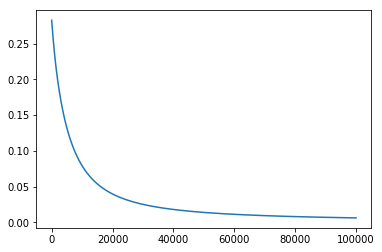

In [7]:
#As we can see, the loss goes down. 
plt.plot(loss_list)
plt.show()